In [1]:
# Import requirements
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
# Normalize dataset
X_train = X_train/255.0
X_test = X_test/255.0

Image label: 5


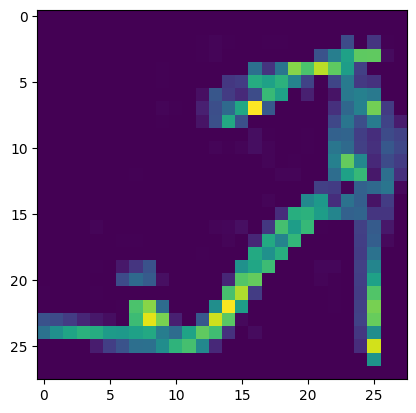

In [4]:
# Show Label
imgIdx = 8
image = X_train[imgIdx]
print('Image label:', y_train[imgIdx])
plt.imshow(image)

In [5]:
# Create NN model
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [7]:
# Fit model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=True)

Epoch 1/10
1500/1500 [==============================] - 15s 7ms/step - loss: 0.4982 - accuracy: 0.8210 - val_loss: 0.4257 - val_accuracy: 0.8418
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3682 - accuracy: 0.8648 - val_loss: 0.3622 - val_accuracy: 0.8721
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3337 - accuracy: 0.8767 - val_loss: 0.3579 - val_accuracy: 0.8700
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3069 - accuracy: 0.8865 - val_loss: 0.3439 - val_accuracy: 0.8775
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2895 - accuracy: 0.8930 - val_loss: 0.3445 - val_accuracy: 0.8753
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2746 - accuracy: 0.8969 - val_loss: 0.3387 - val_accuracy: 0.8806
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2587 - accuracy: 0.9037 - val_loss: 0.3434 - val_ac

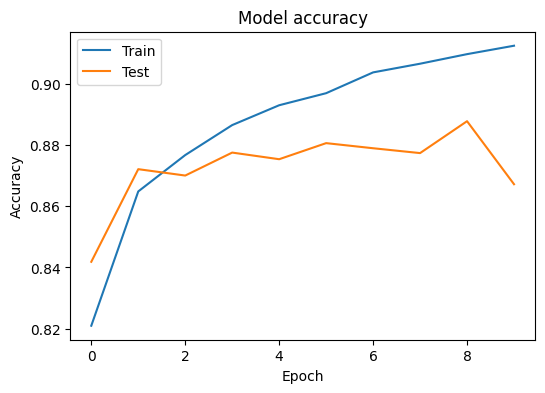

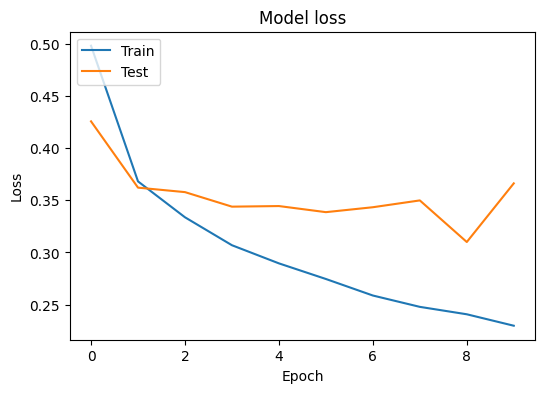

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
# Evaluate model
result = model.evaluate(X_test,  y_test)
print('Loss:', result[0])
print('Accuracy:', result[1])


313/313 [==============================] - 2s 3ms/step - loss: 0.3947 - accuracy: 0.8569
Loss: 0.39471399784088135
Accuracy: 0.8568999767303467


In [10]:
# Predict data
x_pred = X_test[:5]
predictions = model.predict(x_pred)
print(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 132ms/step
[9 2 1 1 6]
